In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/60k-responses-of-16-personalities-test-mbt/16P.csv
/kaggle/input/60k-responses-of-16-personalities-test-mbt/16p-Mapping.txt


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/60k-responses-of-16-personalities-test-mbt/16P.csv', encoding='ISO-8859-1')
df.head()

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [5]:
df.columns

Index(['Response Id', 'You regularly make new friends.',
       'You spend a lot of your free time exploring various random topics that pique your interest',
       'Seeing other people cry can easily make you feel like you want to cry too',
       'You often make a backup plan for a backup plan.',
       'You usually stay calm, even under a lot of pressure',
       'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know',
       'You prefer to completely finish one project before starting another.',
       'You are very sentimental.',
       'You like to use organizing tools like schedules and lists.',
       'Even a small mistake can cause you to doubt your overall abilities and knowledge.',
       'You feel comfortable just walking up to someone you find interesting and striking up a conversation.',
       'You are not too interested in discussing various interpretations and analyses of creative works.',
       'You are more

In [6]:
# Rows and columns
print("Shape:", df.shape)

Shape: (59999, 62)


In [7]:
# Check for nulls
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality            

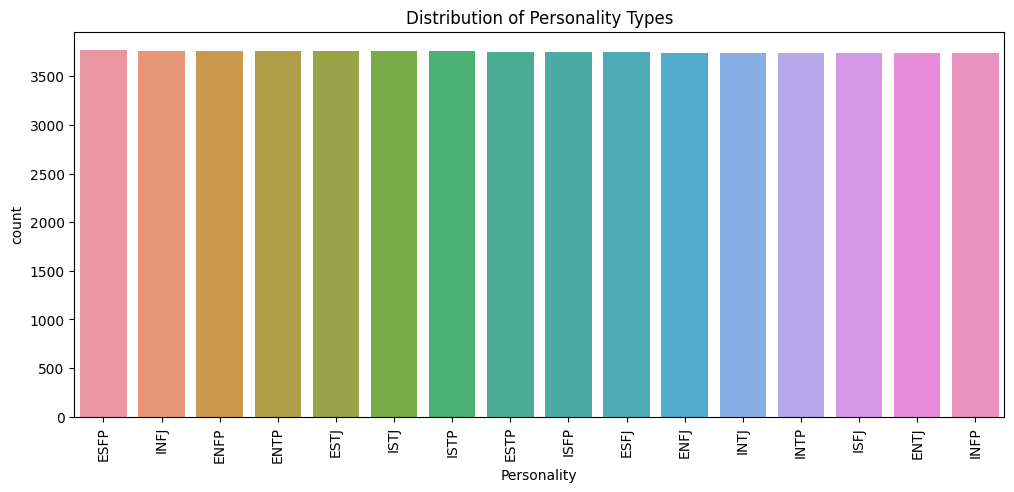

In [8]:
# Count of each personality type
plt.figure(figsize=(12,5))
sns.countplot(x='Personality', data=df, order=df['Personality'].value_counts().index)
plt.title("Distribution of Personality Types")
plt.xticks(rotation=90)
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder

# Drop response ID
df.drop('Response Id', axis=1, inplace=True)

# Label encode the target
le = LabelEncoder()
df['Personality'] = le.fit_transform(df['Personality'])

# Show encoded personality values
df['Personality'].value_counts()

Personality
5     3769
8     3761
1     3760
3     3760
6     3759
14    3756
15    3755
7     3749
13    3746
4     3746
0     3743
10    3743
11    3742
12    3739
2     3737
9     3734
Name: count, dtype: int64

In [10]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import re

In [11]:
# Optional: Clean column names
df.columns = [re.sub(r'\W+', '_', col).strip('_') for col in df.columns]

# Check column names
print(df.columns.tolist())  # Inspect and find the correct target column name

# Example: Set the correct target column here
target_column = 'Personality'  # CHANGE THIS to your actual column name

['You_regularly_make_new_friends', 'You_spend_a_lot_of_your_free_time_exploring_various_random_topics_that_pique_your_interest', 'Seeing_other_people_cry_can_easily_make_you_feel_like_you_want_to_cry_too', 'You_often_make_a_backup_plan_for_a_backup_plan', 'You_usually_stay_calm_even_under_a_lot_of_pressure', 'At_social_events_you_rarely_try_to_introduce_yourself_to_new_people_and_mostly_talk_to_the_ones_you_already_know', 'You_prefer_to_completely_finish_one_project_before_starting_another', 'You_are_very_sentimental', 'You_like_to_use_organizing_tools_like_schedules_and_lists', 'Even_a_small_mistake_can_cause_you_to_doubt_your_overall_abilities_and_knowledge', 'You_feel_comfortable_just_walking_up_to_someone_you_find_interesting_and_striking_up_a_conversation', 'You_are_not_too_interested_in_discussing_various_interpretations_and_analyses_of_creative_works', 'You_are_more_inclined_to_follow_your_head_than_your_heart', 'You_usually_prefer_just_doing_what_you_feel_like_at_any_given_mome

In [12]:
# Split features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

In [13]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train LightGBM model
model = LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 47999, number of used features: 60
[LightGBM] [Info] Start training from score -2.771235
[LightGBM] [Info] Start training from score -2.776911
[LightGBM] [Info] Start training from score -2.772901
[LightGBM] [Info] Start training from score -2.768576
[LightGBM] [Info] Start training from score -2.780600
[LightGBM] [Info] Start training from score -2.779593
[LightGBM] [Info] Start training from score -2.765923
[LightGBM] [Info] Start training from score -2.780600
[LightGBM] [Info] Start training from score -2.777245
[LightGBM] [Info] Start training from score -2.777580
[LightGBM] [Info] Start training from score -2.758008
[LightGBM] [Info] Start training from score -2.773235


LGBMClassifier()

In [15]:
# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9741666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       739
           1       0.97      0.98      0.98       773
           2       0.98      0.98      0.98       738
           3       0.98      0.98      0.98       748
           4       0.97      0.97      0.97       770
           5       0.99      0.97      0.98       790
           6       0.98      0.97      0.98       739
           7       0.97      0.97      0.97       773
           8       0.97      0.97      0.97       775
           9       0.97      0.96      0.97       749
          10       0.96      0.98      0.97       699
          11       0.96      0.98      0.97       744
          12       0.98      0.98      0.98       753
          13       0.98      0.97      0.97       745
          14       0.97      0.98      0.97       740
          15       0.97      0.98      0.98       725

    accuracy              